In [1]:
import numpy as np
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

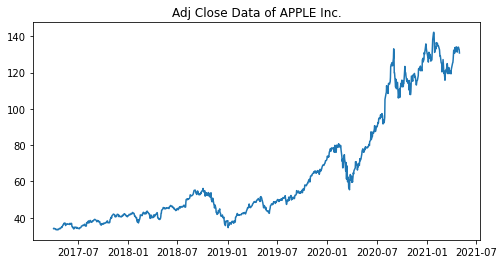

In [2]:
# Import data : Internet Usage per Minute
df = pd.read_csv('apple_raw.csv', index_col=0)
df.index = pd.to_datetime(df.index)
data = df['Adj Close']
plt.figure(figsize=(8,4))
plt.plot(data)
plt.title('Adj Close Data of APPLE Inc.')
plt.show()

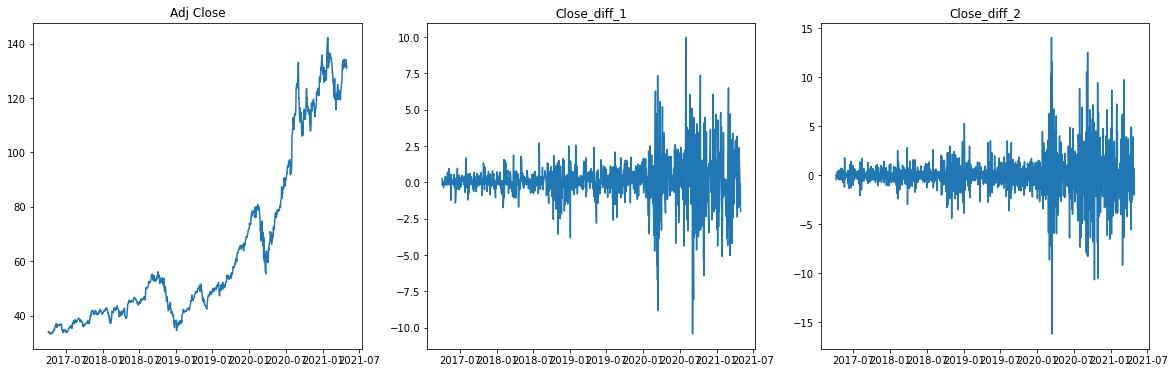

In [3]:
df['Close_diff_1'] = data.diff(1)
df['Close_diff_2'] = df['Close_diff_1'].diff(1)
fig = plt.figure(figsize=(20,6))
ax1 = fig.add_subplot(131)
ax1.plot(df['Adj Close'])
ax1.set_title('Adj Close')
ax2 = fig.add_subplot(132)
ax2.plot(df['Close_diff_1'])
ax2.set_title('Close_diff_1')
ax3 = fig.add_subplot(133)
ax3.plot(df['Close_diff_2'])
ax3.set_title('Close_diff_2')
plt.savefig('./pictures/ARIMA/diff.jpg')
plt.show()

So from the figure above we can see that the time series is nearly stationary in the 1st order difference, so we choose d = 1.

C:\ProgramData\Anaconda3\envs\DAPS\lib\site-packages\statsmodels\graphics\tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


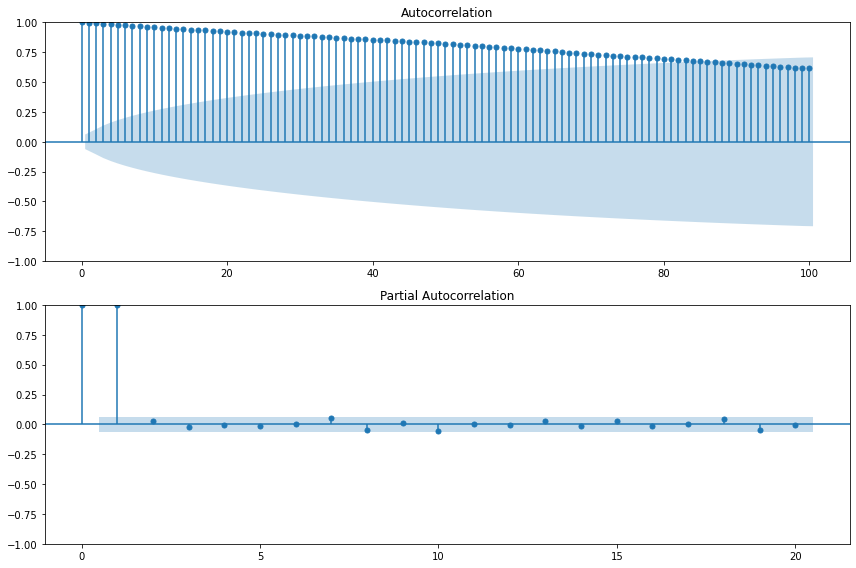

In [28]:
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
 
ax1 = fig.add_subplot(211)
fig = plot_acf(data, lags=100, ax=ax1)
ax1.xaxis.set_ticks_position('bottom')
fig.tight_layout()
 
ax2 = fig.add_subplot(212)
fig = plot_pacf(data, lags=20, ax=ax2)
ax2.xaxis.set_ticks_position('bottom')
fig.tight_layout()

plt.savefig('./pictures/ARIMA/acf&pacf.jpg')
plt.show()

The trailing finger (拖尾) sequence decreases monotonously or oscillatingly at an exponential rate, while the truncated finger (截尾) sequence becomes very small from a certain point in time:
The autocorrelation coefficient is tailed (拖尾) in order 84 and the partial autocorrelation coefficient is truncated  (截尾) in order 2, so the AR(2) model can be selected。

In [8]:
# Perform unit root test on the data after difference
# show the unit root test result after difference, return statistic and p value
from arch.unitroot import ADF
adf_data = ADF(data)
print(adf_data)

   Augmented Dickey-Fuller Results   
Test Statistic                  0.333
P-value                         0.979
Lags                               20
-------------------------------------

Trend: Constant
Critical Values: -3.44 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


The Test results show that the Value of Test Statistic is 0.333, which is greater than the Critical Value given by Critical Value at the significance level of 1%,5% and 10%, and p-value=0.979>0.05. Therefore, the null hypothesis cannot be rejected, indicating that the opening price sequence of the stock is not stable.

C:\ProgramData\Anaconda3\envs\DAPS\lib\site-packages\numpy\core\_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
C:\ProgramData\Anaconda3\envs\DAPS\lib\site-packages\statsmodels\graphics\tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


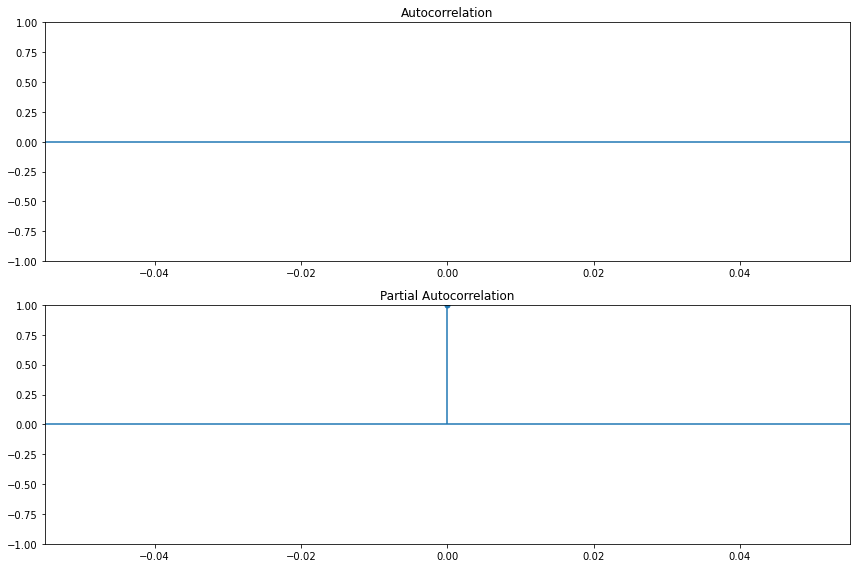

In [14]:
# Draw the acf and pacf of first order differential data
fig = plt.figure(figsize=(12,8))
 
ax1 = fig.add_subplot(211)
fig = plot_acf(data.diff(), lags=20, ax=ax1)
ax1.xaxis.set_ticks_position('bottom')
fig.tight_layout()
 
ax2 = fig.add_subplot(212)
fig = plot_pacf(data.diff(), lags=20, ax=ax2)
ax2.xaxis.set_ticks_position('bottom')
fig.tight_layout()

plt.savefig('./pictures/ARIMA/acf&pacf.jpg')
plt.show()

C:\ProgramData\Anaconda3\envs\DAPS\lib\site-packages\statsmodels\tsa\base\tsa_model.py:595: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\ProgramData\Anaconda3\envs\DAPS\lib\site-packages\statsmodels\tsa\base\tsa_model.py:595: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\ProgramData\Anaconda3\envs\DAPS\lib\site-packages\statsmodels\tsa\base\tsa_model.py:595: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                               SARIMAX Results                                
Dep. Variable:              Adj Close   No. Observations:                 1027
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -1912.890
Date:                Thu, 20 Jan 2022   AIC                           3829.779
Time:                        23:34:28   BIC                           3839.646
Sample:                             0   HQIC                          3833.525
                               - 1027                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1176      0.018     -6.687      0.000      -0.152      -0.083
sigma2         2.4374      0.048     51.121      0.000       2.344       2.531
Ljung-Box (L1) (Q):                   0.00   Jarque-

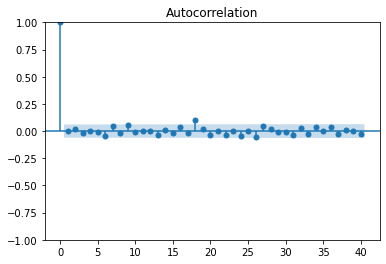

In [32]:
model = sm.tsa.ARIMA(data, order=(1, 1, 0))
model_fit = model.fit()
resid = model_fit.resid
fig = sm.graphics.tsa.plot_acf(resid.values.squeeze(), lags=40)
print(model_fit.summary())

plt.savefig('./pictures/ARIMA/model_validation.jpg')
plt.show()

C:\ProgramData\Anaconda3\envs\DAPS\lib\site-packages\statsmodels\tsa\base\tsa_model.py:595: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\ProgramData\Anaconda3\envs\DAPS\lib\site-packages\statsmodels\tsa\base\tsa_model.py:595: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\ProgramData\Anaconda3\envs\DAPS\lib\site-packages\statsmodels\tsa\base\tsa_model.py:595: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\ProgramData\Anaconda3\envs\DAPS\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge

                               SARIMAX Results                                
Dep. Variable:              Adj Close   No. Observations:                 1027
Model:                ARIMA(2, 1, 84)   Log Likelihood               -1817.538
Date:                Thu, 20 Jan 2022   AIC                           3809.077
Time:                        23:51:16   BIC                           4238.285
Sample:                             0   HQIC                          3972.002
                               - 1027                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3442      0.445     -0.774      0.439      -1.216       0.528
ar.L2          0.0673      0.377      0.178      0.858      -0.672       0.807
ma.L1          0.2381      0.445      0.535      0.5

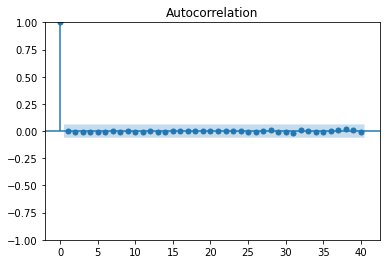

In [34]:
model = sm.tsa.ARIMA(data, order=(2,1,84))
model_fit = model.fit()
resid = model_fit.resid
fig = sm.graphics.tsa.plot_acf(resid.values.squeeze(), lags=40)
print(model_fit.summary())

plt.savefig('./pictures/ARIMA/model_valid_84.jpg')
plt.show()

C:\ProgramData\Anaconda3\envs\DAPS\lib\site-packages\statsmodels\tsa\base\tsa_model.py:393: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


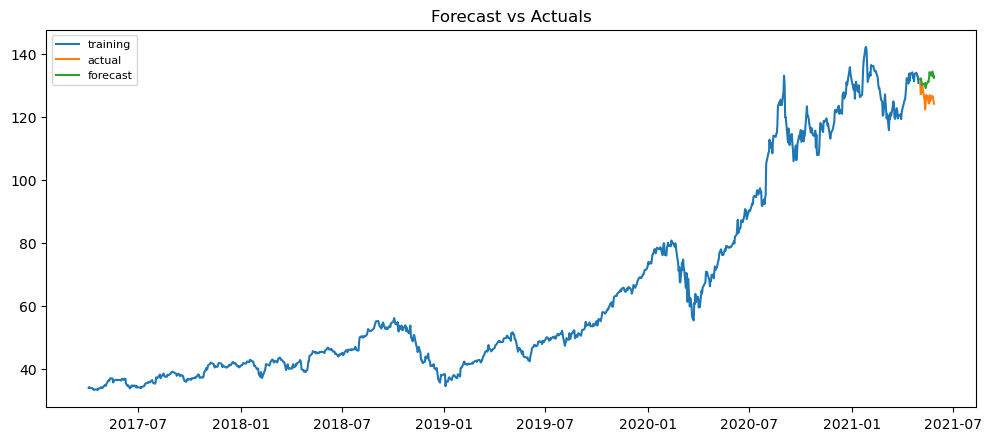

In [48]:
from statsmodels.tsa.stattools import acf

# Create Training and Test
df_test = pd.read_csv('apple_raw_test.csv', index_col=0)
df_test.index = pd.to_datetime(df_test.index)
test = df_test['Adj Close']

# Forecast
results = model_fit.forecast(20, alpha=0.05)  # 95% conf
results.index = test.index

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(data, label='training')
plt.plot(test, label='actual')
plt.plot(results, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.savefig('./pictures/ARIMA/result_all.jpg')
plt.show()

In [49]:
from sklearn.metrics import mean_squared_error

mean_squared_error(results, test)

36.7348759968683

### Residual Distribution

C:\ProgramData\Anaconda3\envs\DAPS\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\ProgramData\Anaconda3\envs\DAPS\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


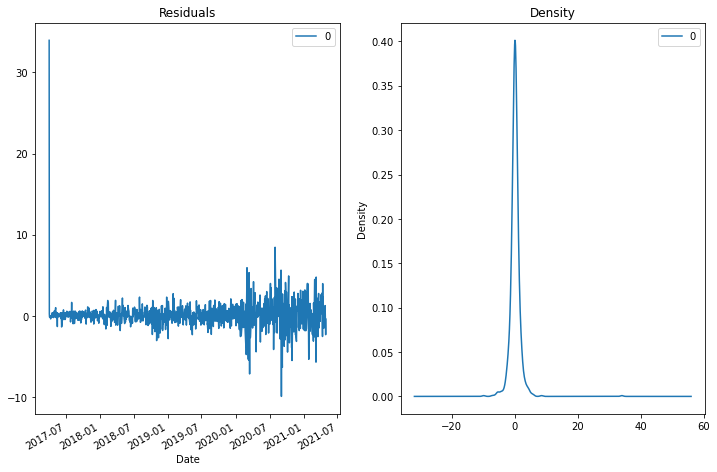

In [51]:
# Plot residual errors
residuals = pd.DataFrame(resid)
fig, ax = plt.subplots(1,2, figsize=(12,8))
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.savefig('./pictures/ARIMA/residual_density.jpg')
plt.show()

The density diagram of the residual error value is obtained, which shows that the error is gaussian distribution.

In [55]:
residuals.describe()

,0
count,1027.000000
mean,0.108813
std,1.761981
min,-9.918080
25%,-0.499878
50%,0.050794
75%,0.656230
max,33.962158


The mean is not 0, which means that there's still exists some errors in testing period.